### Algotimos genéticos

Para los ejemplos utilizaremos el problema del viajante de comercio (TSP)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy
import time

## **Chromosome and fitness function**

In [3]:
cities = [
	[0.8744058793117488, 0.30207179832703746],
    [0.6901572276474558, 0.8203362566663311],
    [0.7793458478083026, 0.09728979746351918], 
    [0.7483358474304422, 0.4563419482458657], 
    [0.4556164527790729, 0.12863149772605698], 
    [0.1837236688553453, 0.23773749495644914], 
    [0.806151832654163, 0.3288366900529254], 
    [0.6222702185205219, 0.6019431085670109], 
    [0.21886861543988367, 0.6980104036528004], 
    [0.9706096813038716, 0.054871876245520146], 
    [0.13881496219356027, 0.048489530185603646],
    [0.08511086492841424, 0.9123075505436051], 
    [0.45436952164297595, 0.4731540740573398], 
    [0.8986352255038935, 0.5116579750591849], 
    [0.9539248970461742, 0.7530784036308166],
    [0.6321102985156373, 0.13575967095580344],
    [0.31130918313591205, 0.8545457319320597], 
    [0.025897479791937017, 0.7854526665590987],
    [0.31414095045738066, 0.051421702103483846],
    [0.2739561013272712, 0.1970964027924862],
    [0.22762328443470214, 0.627414210742153],
    [0.44920042912037383, 0.18835427573438068],
    [0.2793138301174244, 0.9103956650199608],
    [0.005128451667189338, 0.4655718085045638], 
    [0.9222718335261915, 0.8613103704784812],
    [0.49352498279326595, 0.28652416807644077],
    [0.5560886356057152, 0.034564925228364185],
    [0.0048939219846825255, 0.8635350555457212], 
    [0.7824462381771976, 0.09355415747424733], 
    [0.2973635133076785, 0.037580527218207815],
    [0.659068210692151, 0.5602321147981546], 
    [0.43549418718677035, 0.6241289474799954],
    [0.25580657871099755, 0.519726015381631], 
    [0.5950780852425872, 0.3193476592023645],
    [0.15763623266223903, 0.18210618406479095], 
    [0.3434173147566393, 0.32992255868483356], 
    [0.06451313705472006, 0.12606114349173192], 
    [0.23212286400737547, 0.3945559700824013], 
    [0.955507285594692, 0.02296933408938162],
    [0.7459955912073274, 0.1385374827130177],
    [0.46365765315595475, 0.6132297411379687],
    [0.20196772698059162, 0.046358747430397584], 
    [0.2980093518214506, 0.36041197123227897],
    [0.7533459401199348, 0.6610562232191091], 
    [0.323433933838161, 0.5068337090138902], 
    [0.062138830138457, 0.7177455044259695], 
    [0.47467832142010535, 0.17692718986260936],
    [0.2415634321550142, 0.500852093941769],
    [0.3441878827094532, 0.2604351258948506], 
    [0.5445252142594251, 0.7295590645635646],
    [0.25391391610860914, 0.7641244059389684],
    [0.2630560480211699, 0.010670642241309536],
    [0.2092202940037915, 0.7415775443241935],
    [0.0031474687633804566, 0.6974574785842637],
    [0.4952329615559806, 0.9311775894780175], 
    [0.1978488658972426, 0.8872693649066419],
    [0.1705364411799497, 0.8846808176103278], 
    [0.7634962513234275, 0.4358457309207533], 
    [0.9259752834140167, 0.0056226911773098465],
    [0.22090405091557253, 0.14500040130773872], 
    [0.4636205151855679, 0.19249574424477278], 
    [0.8057632881682811, 0.250168118157608], 
    [0.6785236695642043, 0.39119477830554505],
    [0.4837264739606879, 0.23045417711558214],
    [0.8786721718893166, 0.015853186240832207],
    [0.1263309724872509, 0.9185321014517236], 
    [0.24969404380600335, 0.9600467657522086],
    [0.5886119367943214, 0.10948123668473264], 
    [0.13373527735293878, 0.5336853876899833], 
    [0.5642696742735989, 0.9801384844337597], 
    [0.646401605512568, 0.3338636388089157], 
    [0.05603526365085032, 0.3149530712641142], 
    [0.387141492676661, 0.5792852545912592], 
    [0.8634070619751958, 0.8206820685065667],
    [0.4662474858565825, 0.32647667516764145], 
    [0.01801973379815025, 0.12175434785651695],
    [0.6218125565554127, 0.07860046445444713], 
    [0.6573938922925594, 0.5023092428939168], 
    [0.2837581848186974, 0.02576704782244421], 
    [0.3044774374252185, 0.7310313422019327], 
    [0.33131673439274434, 0.693896434962478], 
    [0.8523694048117944, 0.2805224723356823], 
    [0.6200019812032047, 0.03989814578273998],
    [0.5437394088109648, 0.3258031129949792],
    [0.4386079860370994, 0.6142798815693052],
    [0.7430581106897977, 0.49260737229959284], 
    [0.3913628378102181, 0.3185830750836698], 
    [0.9065498976196814, 0.02381958527497441], 
    [0.6874236611131453, 0.18642068590773597], 
    [0.6946411585627993, 0.36991609629423117], 
    [0.3784063098306413, 0.01018756575849844], 
    [0.43806374889930155, 0.2268325586117821], 
    [0.7411632641820634, 0.35513151640087337], 
    [0.3884706603234591, 0.34043302784114093], 
    [0.08674110453583683, 0.4491174987265194], 
    [0.9794883193315694, 0.11207520940235804], 
    [0.7496156619797683, 0.23845386610980834], 
    [0.4423888847621813, 0.17212722421686055], 
    [0.2276570035864689, 0.6515924491551327],
    [0.836939257954547, 0.0499933914625984]
] # Length=8.587

def dist(x, y): # distancia euclídea
	return ((x[0]-y[0])**2 + (x[1]-y[1])**2) ** 0.5

def globaldist(cities): # calcula la ditancia global de una solución
	acum = 0.0
	for i in range(len(cities)):
		acum += dist(cities[i-1],cities[i]) # -1 is the last element
	return acum

def fit_cities(cities): # fitness para TSP
	return 1 / (1+globaldist(cities))

## **Visual test**

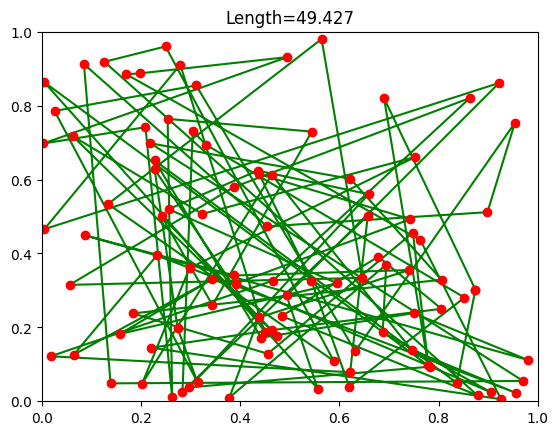

In [4]:
# draw a TSP solution
def draw(solution):
    plt.ion()
    fig = plt.figure()
    axes = fig.add_subplot(111)
    xlim = axes.set_xlim(0.0,1.0)
    ylim = axes.set_ylim(0.0,1.0)
    x = []
    y = []

    bucle = solution + [solution[0]] # añade al final la vuelta a la primera

    c = np.array(bucle)
    x = c[:,0]
    y = c[:,1]

    l1, = axes.plot(x, y,'g')
    l2, = axes.plot(x, y,'ro')
    
    s = 'Length=%5.3f' % globaldist(bucle)
    plt.title(s)

draw(cities)

## **Method´s implementation**

In [ ]:
def create(alphabet: list, N=100) -> list[list]:
    """Create and return new population"""

    population = []
    for i in range(N):
        population.append(copy.copy(alphabet))
        random.shuffle(population[i])
    return population

def sort_pop(population: list[list], fitness_function, reversed: bool) -> tuple[list[list], list]:
    """Sort population by fitness function. Return tuple with population list and fitness list"""

    fitness_list = [fitness_function(ind) for ind in population]
    lista = sorted(zip(population, fitness_list), key=lambda x: x[1], reverse=reversed)
    sorted_pop = [x[0] for x in lista]
    sorted_fitness = [x[1] for x in lista]
    return sorted_pop, sorted_fitness

def select(population: list[list], T: int) -> list:
    """Return a copy of an indivudual by tournament selection. Population already ordered by fitness"""

    choices=random.choices(copy.copy(population),k=T)
    indices=[population.index(c) for c in choices]
    return population[np.argmin(indices)]

def crossover(parent1: list, parent2: list, pcross: float) -> tuple[list, list]:
    """Performs crossover on two parents to generate two children. PMX method"""

    if random.random() < pcross:
        size = len(parent1)
        start, end = sorted(random.sample(range(size), 2))

        # Copiar segmento intermedio
        child1[start:end+1] = parent1[start:end+1]
        child2[start:end+1] = parent2[start:end+1]

        # Mapear elementos del segmento intermedio para el primer hijo
        for i in range(start, end+1):
            if parent2[i] not in child1:
                pos = i
                while start <= pos <= end:
                    pos = parent2.index(parent1[pos])
                child1[pos] = parent2[i]

        # Mapear elementos del segmento intermedio para el segundo hijo
        for i in range(start, end+1):
            if parent1[i] not in child2:
                pos = i
                while start <= pos <= end:
                    pos = parent1.index(parent2[pos])
                child2[pos] = parent1[i]

        # Rellenar valores restantes en el primer hijo
        for i in range(size):
            if child1[i] == -1:
                child1[i] = parent2[i]

        # Rellenar valores restantes en el segundo hijo
        for i in range(size):
            if child2[i] == -1:
                child2[i] = parent1[i]
    else:
        child1 = parent1[:]
        child2 = parent2[:]

    return child1, child2

def mutate(individual: list[list], pmut: float) -> list:
    """Mutate an individual, swap elements. Return mutated individual"""

    def mutate_swap(individual: list[list], pmut: float) -> list[list]:
        """la mutación consistirá en intercambiar elementos"""
        if random.random() < pmut:
            index1, index2 = random.choices(range(len(individual)), k=2)
            individual[index1], individual[index2] = individual[index2], individual[index1]
        return individual

    def mutate_insert(individual: list[list], pmut: float) -> list[list]:
        """la mutación consistirá en borrar un elemento e insertarlo en otro lado"""
        if random.random() < pmut:
            index_pop, index_insert = random.choices(range(len(individual)), k=2)
            value = individual.pop(index_pop)
            individual.insert(index_insert, value)
        return individual

    def mutate_reverse(individual: list[list], pmut: float) -> list[list]: 
        """selecciona dos puntos e invierte la secuencia entre ellos"""
        if random.random() < pmut:
            index1, index2 = sorted(random.sample(range(len(individual)), 2))
            individual[index1:index2 + 1] = individual[index1:index2 + 1][::-1]
        return individual
    
    mutations = [mutate_swap, mutate_insert, mutate_reverse]
    operator = random.choice(mutations)
    return operator(individual, pmut)

def evolve(population: list[list], fitness_function, pmut=0.1, pcross=0.7, ngen=100, T=2, trace=50, reverse_sort=False, elitism=False) -> None:
    """Evolution procedure"""

    for i in range(ngen):
        new_pop = []
        sorted_pop, sorted_fitness = sort_pop(population, fitness_function, reverse_sort)
        if elitism:
            new_pop.append(sorted_pop[0])
            new_pop.append(sorted_pop[1])
        while len(new_pop) != 100:   
            individual1 = select(sorted_pop, T)
            individual2 = select(sorted_pop, T)
            child1,child2 = crossover(individual1, individual2, pcross)
            mutated1 = mutate(child1, pmut)
            mutated2 = mutate(child2, pmut)
            new_pop.append(mutated1)
            new_pop.append(mutated2)
        
        if i % trace == 0 or i == ngen-1: # en la última gen se ordena
            sorted_pop, sorted_fitness = sort_pop(population, fitness_function, reverse_sort)
            print(f"Num gen: {i}, Fitness óptimo: {sorted_fitness[0]}")
        population = [*new_pop] # make a copy
    return population

## **---------------------------Tests---------------------------**

### **1.000 generations**

Num gen: 0, Fitness óptimo: 45.76933323321555
Num gen: 100, Fitness óptimo: 25.76737199382818
Num gen: 200, Fitness óptimo: 18.174402439794225
Num gen: 300, Fitness óptimo: 16.486206124978874
Num gen: 400, Fitness óptimo: 14.469940134160886
Num gen: 500, Fitness óptimo: 13.385485538099942
Num gen: 600, Fitness óptimo: 12.883794519764912
Num gen: 700, Fitness óptimo: 11.88077645101294
Num gen: 800, Fitness óptimo: 11.267465220505663
Num gen: 900, Fitness óptimo: 10.873212172648165
Num gen: 999, Fitness óptimo: 10.177442470509758
*******Tiempo transcurrido: 0 minutos y 5.30 segundos*******


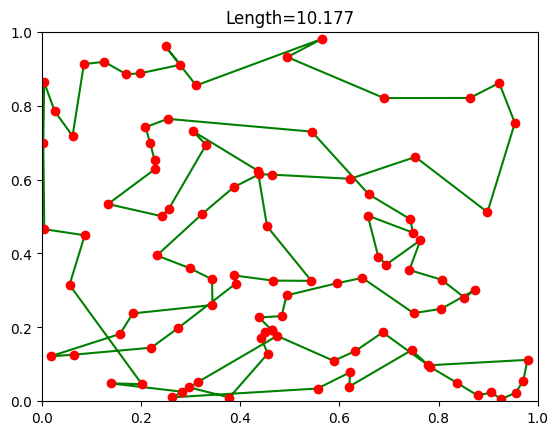

In [17]:
start = time.time()
pop = create(cities)
final_pop = evolve(pop, globaldist, pmut=0.1, ngen=1000, trace=100, T=6)
minutos, segundos = divmod(time.time()-start, 60)
print(f"*******Tiempo transcurrido: {int(minutos)} minutos y {segundos:.2f} segundos*******")

draw(final_pop[0])

### **10.000 generations**

Num gen: 0, Fitness óptimo: 43.671040739513934
Num gen: 500, Fitness óptimo: 12.932646246229673
Num gen: 1000, Fitness óptimo: 10.471959363020813
Num gen: 1500, Fitness óptimo: 9.549359472803836
Num gen: 2000, Fitness óptimo: 8.959391006530407
Num gen: 2500, Fitness óptimo: 8.494009269717422
Num gen: 3000, Fitness óptimo: 8.250584553775072
Num gen: 3500, Fitness óptimo: 7.966158630588855
Num gen: 4000, Fitness óptimo: 7.903618115138602
Num gen: 4500, Fitness óptimo: 7.903066460076209
Num gen: 5000, Fitness óptimo: 7.883497271177508
Num gen: 5500, Fitness óptimo: 7.848562211908674
Num gen: 6000, Fitness óptimo: 7.848562211908673
Num gen: 6500, Fitness óptimo: 7.848562211908673
Num gen: 7000, Fitness óptimo: 7.848562211908673
Num gen: 7500, Fitness óptimo: 7.848562211908673
Num gen: 8000, Fitness óptimo: 7.848562211908673
Num gen: 8500, Fitness óptimo: 7.848562211908673
Num gen: 9000, Fitness óptimo: 7.8043444736860605
Num gen: 9500, Fitness óptimo: 7.8043444736860605
Num gen: 9999, Fitn

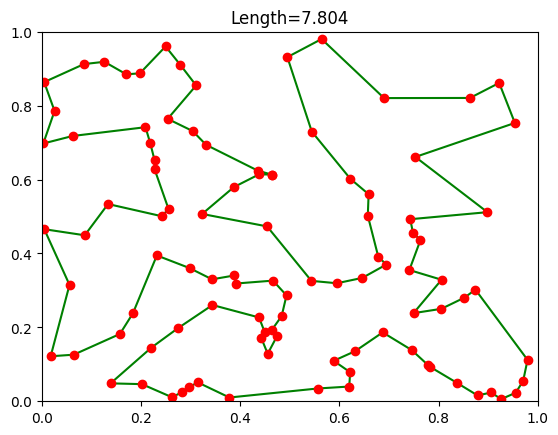

In [18]:
start = time.time()
pop = create(cities)
final_pop = evolve(pop, globaldist, pmut=0.1, ngen=10000, trace=500, T=6)
minutos, segundos = divmod(time.time()-start, 60)
print(f"*******Tiempo transcurrido: {int(minutos)} minutos y {segundos:.2f} segundos*******")

draw(final_pop[0])

### **With elitism**

Num gen: 0, Fitness óptimo: 46.12700426487472
Num gen: 500, Fitness óptimo: 12.982661312239054
Num gen: 1000, Fitness óptimo: 9.774628209974491
Num gen: 1500, Fitness óptimo: 8.933676619525732
Num gen: 2000, Fitness óptimo: 8.520050244310456
Num gen: 2500, Fitness óptimo: 8.325323429785447
Num gen: 3000, Fitness óptimo: 8.310517257091245
Num gen: 3500, Fitness óptimo: 8.106357971722584
Num gen: 4000, Fitness óptimo: 8.103652607546055
Num gen: 4500, Fitness óptimo: 8.095748283639237
Num gen: 5000, Fitness óptimo: 8.095748283639237
Num gen: 5500, Fitness óptimo: 8.095748283639237
Num gen: 6000, Fitness óptimo: 8.095748283639237
Num gen: 6500, Fitness óptimo: 8.095748283639237
Num gen: 7000, Fitness óptimo: 8.095748283639237
Num gen: 7500, Fitness óptimo: 8.095748283639237
Num gen: 8000, Fitness óptimo: 8.095748283639237
Num gen: 8500, Fitness óptimo: 8.095748283639237
Num gen: 9000, Fitness óptimo: 8.008311145553208
Num gen: 9500, Fitness óptimo: 7.951778365331585
Num gen: 9999, Fitness 

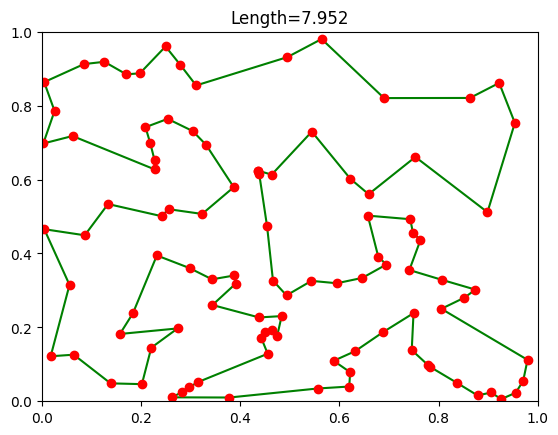

In [21]:
start = time.time()
pop = create(cities)
final_pop = evolve(pop, globaldist, pmut=0.1, ngen=10000, trace=500, T=6, elitism=True)
minutos, segundos = divmod(time.time()-start, 60)
print(f"*******Tiempo transcurrido: {int(minutos)} minutos y {segundos:.2f} segundos*******")

draw(final_pop[0])

Num gen: 0, Fitness óptimo: 7.951778365331585
Num gen: 500, Fitness óptimo: 7.951778365331585
Num gen: 1000, Fitness óptimo: 7.951778365331585
Num gen: 1500, Fitness óptimo: 7.951778365331585
Num gen: 2000, Fitness óptimo: 7.951778365331585
Num gen: 2500, Fitness óptimo: 7.951778365331585
Num gen: 3000, Fitness óptimo: 7.951778365331585
Num gen: 3500, Fitness óptimo: 7.951778365331585
Num gen: 4000, Fitness óptimo: 7.944117285234582
Num gen: 4500, Fitness óptimo: 7.944117285234582
Num gen: 5000, Fitness óptimo: 7.944117285234582
Num gen: 5500, Fitness óptimo: 7.9322091764328855
Num gen: 6000, Fitness óptimo: 7.9322091764328855
Num gen: 6500, Fitness óptimo: 7.9322091764328855
Num gen: 7000, Fitness óptimo: 7.9322091764328855
Num gen: 7500, Fitness óptimo: 7.9322091764328855
Num gen: 8000, Fitness óptimo: 7.9322091764328855
Num gen: 8500, Fitness óptimo: 7.9322091764328855
Num gen: 9000, Fitness óptimo: 7.9322091764328855
Num gen: 9500, Fitness óptimo: 7.9322091764328855
Num gen: 9999, 

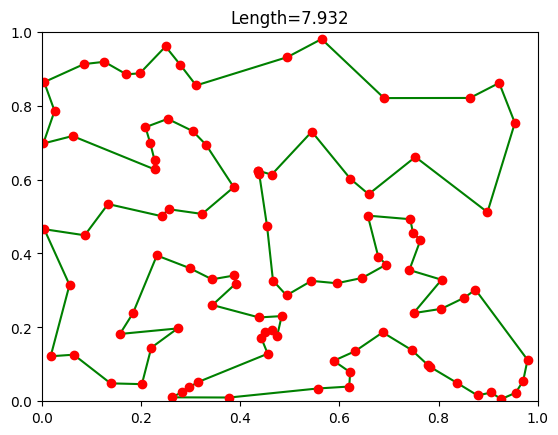

In [22]:
start = time.time()
final_pop = evolve(final_pop, globaldist, pmut=0.1, ngen=10000, trace=500, T=6, elitism=True)
minutos, segundos = divmod(time.time()-start, 60)
print(f"*******Tiempo transcurrido: {int(minutos)} minutos y {segundos:.2f} segundos*******")

draw(final_pop[0])

## **Otras sugerencias opcionales**
  * *Ampliar el TSP a 3 dimensiones*, incluyendo el dibujo con matplotlib.
  * *Cuadrado mágico de 8x8*: deben sumar lo mismo filas, columnas y diagonales principales.
  * *n-reinas*: colocar n reinas en un tablero de modo que ninguna se coma a otra.
  * *mochila*: llenar una mochila con objetos de una tabla de modo que se maximice la supervivencia y no se exceda la capacidad.
  * *Probar con otras funciones numéricas con convexas* (ver la celda siguiente).

Ejemplo de cuadrado mágico de 8x8:

[[63 54 14 44 13 57  7  8]  
 [20  2 45  9 17 64 51 52]  
 [38 47 21 62 27 29  4 32]  
 [18 36 33 40 28 23 34 48]  
 [39  3 50  5 42 24 56 41]  
 [12 26 43 30 53 16 22 58]  
 [11 37 35 60 49  1 61  6]  
 [59 55 19 10 31 46 25 15]]  

In [ ]:
# otras funciones

import math
def ackley (ch): # min in (0,0); huge set of local minima
	x = ch[0]
	y = ch[1]
	fxy = -20 * math.exp( -0.2 * (0.5 * (x**2 + y**2)) ** 0.5 ) \
		- math.exp (0.5 * (math.cos(2 * math.pi * x) + math.cos(2 * math.pi * y))) + math.e + 20
	return fxy

def beale (ch):
	x = ch[0]
	y = ch[1]
	term1 = (1.5 - x + x * y) ** 2
	term2 = (2.25 - x + x * y ** 2) ** 2
	term3 = (2.625 - x + x * y ** 3) ** 2
	return term1 + term2 + term3

def easom (ch):
	x = ch[0]
	y = ch[1]
	return -math.cos(x) * math.cos(y) * math.exp(-(x - math.pi)**2 - (y - math.pi)**2)

def goldstein_price_function(ch):
	x = ch[0]
	y = ch[1]
	term1 = (1 + (x + y + 1) ** 2 * (19 - 14 * x + 3 * x ** 2 - 14 * y + 6 * x * y + 3 * y ** 2))
	term2 = (30 + (2 * x - 3 * y) ** 2 * (18 - 32 * x + 12 * x ** 2 + 48 * y - 36 * x * y + 27 * y ** 2))
	return term1 * term2

def rosenbrock (ch):
	x = ch[0]
	y = ch[1]
	a = 1
	b = 100
	term1 = (a - x) ** 2
	term2 = b * (y - x ** 2) ** 2
	return term1 + term2

def rosenbrock_ndim (x):
    a = 1
    b = 100
    sum = 0
    for i in range(len(x)-1):
        sum += (a - x[i])**2 + b * (x[i+1] - x[i]**2)**2
    return sum


### Otros ejemplos

  * Canal del profesor en https://www.youtube.com/@franciscoserradilla5932
  * Viajante de comercio en 3D: https://youtu.be/M-Wvq6LS_Ko?si=a9AkrZ0ipgoYr8x6
  * Lunar lander con Neuroevolución: https://youtu.be/nIS9yeiqDEA?si=uvUJr_aY4KUyKdqx
  